In [24]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
import glob as glob

In [25]:
#dSphNames = ['CBe','DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','Wil1']
dSphNames = ['CBe','DraI','RetII', 'Scl', 'SgrII', 'UMaII', 'UMi','Wil1']
#dSphLabels = [r'DraI (T$_{obs}$=100h)', r'Wil1 (T$_{obs}$=100h)', r'CBe (T$_{obs}$=100h)', r'Scl (T$_{obs}$=100h)',r'RetII (T$_{obs}$=100h)', r'SgrII (T$_{obs}$=100h)']
dSphcolor = ['red','blue','green','black','pink','brown','olive','cyan']
channels = ['b','Tau']
profiles=['Einasto']

In [26]:
df_list = []
for name in dSphNames:
    for profile in profiles:
    
        filename = 'sv_limits_quantiles/'+name+'_'+profile+'_Decay.csv'
        df_list.append(pd.read_csv(filename))
        
df = pd.concat(df_list, ignore_index=True)
df.drop_duplicates(inplace=True)

# Rescale mass column by 1/1000 to have it in TeV
df['mass'] = df['mass'] / 1000

In [27]:
df_list_wsj = []
for name in dSphNames:
    for profile in profiles:
    
        filename_wsj = 'sv_limits_quantiles_files_wsj/'+name+'_'+profile+'_Decay_wsj.csv'
        df_list_wsj.append(pd.read_csv(filename_wsj))
        
df_wsj = pd.concat(df_list_wsj, ignore_index=True)
df_wsj.drop_duplicates(inplace=True)

# Rescale mass column by 1/1000 to have it in TeV
df_wsj['mass'] = df_wsj['mass'] / 1000

In [39]:

df_stack_DraI_and_UMi_T300_wsj = pd.read_csv('sv_limits_quantiles_files_wsj/Combined_Einasto_Decay_DraI_UMi_T600_wsj.csv')
df_stack_CBe_Wil1_T300_wsj = pd.read_csv('sv_limits_quantiles_files_wsj/Combined_Einasto_Decay_CBe_Wil1_T600_wsj.csv')
df_stack_UMi_and_CBe_T300 = pd.read_csv('sv_limits_quantiles/Combined_Decay_CBe_UMi_T600.csv')

df_stack_all = pd.read_csv('sv_limits_quantiles/Combined_Decay_allSources_T600.csv')
df_stack_all_wsj = pd.read_csv('sv_limits_quantiles_files_wsj/Combined_Einasto_Decay_allSources_T600_wsj.csv')

df_stack_DraI_and_UMi_T300_wsj['mass'] = df_stack_DraI_and_UMi_T300_wsj['mass'] / 1000
df_stack_CBe_Wil1_T300_wsj['mass'] = df_stack_CBe_Wil1_T300_wsj['mass'] / 1000
df_stack_UMi_and_CBe_T300['mass'] = df_stack_UMi_and_CBe_T300['mass'] / 1000
df_stack_all_wsj['mass'] = df_stack_all_wsj['mass'] / 1000
df_stack_all['mass'] = df_stack_all['mass'] / 1000


## Single and all combined

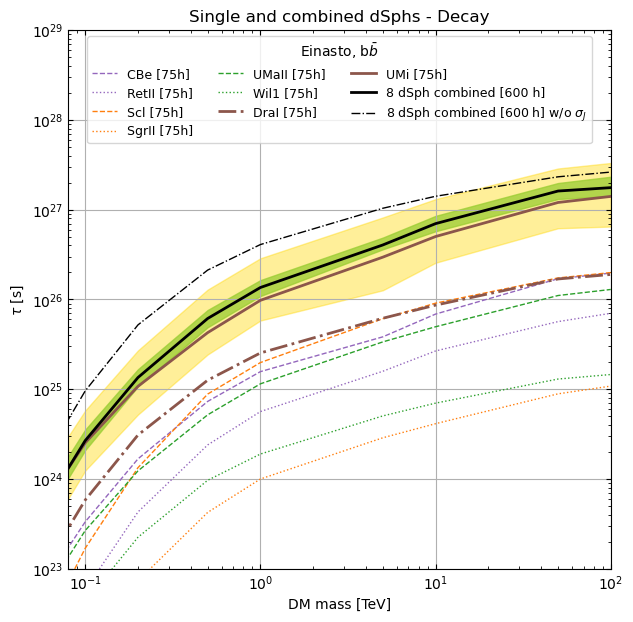

In [33]:
fig = plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\tau$ [s]")
plt.xlim(8e-2,1e2)
plt.ylim(1e23,1e29)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title('Single and combined dSphs - Decay')

plt.grid()
plt.tick_params(which='both', direction='in', top=True, right=True)

profile='Einasto'

dSphNames = ['CBe','RetII', 'Scl', 'SgrII', 'UMaII', 'Wil1', 'DraI', 'UMi']
dSphLabels = ['CBe [75h]','RetII [75h]', 'Scl [75h]' , 'SgrII [75h]', 'UMaII [75h]','Wil1 [75h]', 'DraI [75h]','UMi [75h]'] 
dSphcolor = ['tab:purple','tab:purple','tab:orange','tab:orange','tab:green','tab:green','tab:brown','tab:brown']
linestyles = ["--",":","--",":","--",":","-.","-"]
linesizes = [1,1,1,1,1,1,2,2]

profile='Einasto'

contador = 0
for name, color,lsize,lstyle,label in zip(dSphNames,dSphcolor,linesizes,linestyles,dSphLabels):

    scale = 1
    scale_time = np.sqrt(100./75)
    
    mask = (df_wsj['quantile'] == 0.5) & (df_wsj['name']==name) & (df_wsj['profile']== profile) & (df_wsj['ch']=='b')
    plt.loglog(df_wsj[mask]['mass'],df_wsj[mask]['tau'] / scale_time, 
               ls=lstyle, linewidth=lsize, color=color,
               #marker='o',
               label=label)


    contador = contador + 1
    
    
    
mask_dw = (df_stack_all_wsj['quantile'] == 0.05) & (df_stack_all_wsj['profile']==profile) & (df_stack_all_wsj['ch']=='b')
mask_up = (df_stack_all_wsj['quantile'] == 0.95) & (df_stack_all_wsj['profile']==profile) & (df_stack_all_wsj['ch']=='b')
plt.fill_between(df_stack_all_wsj[mask_dw]['mass'],
                 df_stack_all_wsj[mask_up]['tau'],
                 df_stack_all_wsj[mask_dw]['tau'], color='gold', alpha=0.4)


mask_dw = (df_stack_all_wsj['quantile'] == 0.32) & (df_stack_all_wsj['profile']==profile) & (df_stack_all_wsj['ch']=='b')
mask_up = (df_stack_all_wsj['quantile'] == 0.68) & (df_stack_all_wsj['profile']==profile) & (df_stack_all_wsj['ch']=='b')
plt.fill_between(df_stack_all_wsj[mask_dw]['mass'],
                 df_stack_all_wsj[mask_up]['tau'],
                 df_stack_all_wsj[mask_dw]['tau'], color='yellowgreen', alpha=0.75)



mask = (df_stack_all_wsj['quantile'] == 0.5) & (df_stack_all_wsj['profile']==profile) & (df_stack_all_wsj['ch']=='b')
plt.loglog(df_stack_all_wsj[mask]['mass'],df_stack_all_wsj[mask]['tau'], 
           ls='-', linewidth=2, color='black',
           #marker='o',
           label='8 dSph combined [600 h]') 

mask = (df_stack_all['quantile'] == 0.5) & (df_stack_all['profile']==profile) & (df_stack_all['ch']=='b')
plt.loglog(df_stack_all[mask]['mass'],df_stack_all[mask]['tau'], 
           ls='-.', linewidth=1, color='black',
           #marker='o',
           label=r'8 dSph combined [600 h] w/o $\sigma_J$') 



plt.legend(title=r'Einasto, b$\bar{b}$', fontsize=9, ncols=3, loc='upper center')

plt.savefig('plot_single_combined_dec_einasto_bb.png', bbox_inches='tight', pad_inches=0.3)


## Two best and combined

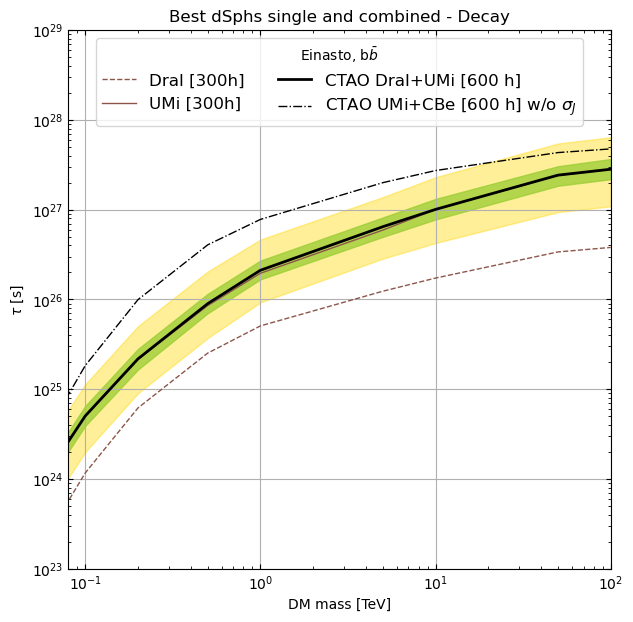

In [44]:
fig = plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\tau$ [s]")
plt.xlim(8e-2,1e2)
plt.ylim(1e23,1e29)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title('Best dSphs single and combined - Decay')

plt.grid()
plt.tick_params(which='both', direction='in', top=True, right=True)


dSphNamesNorth = ['DraI', 'UMi'] # don't care about the variable name
dSphLabelsNorth = ['DraI [300h]', 'UMi [300h]']
colorNorth = ['tab:brown','tab:brown']
lstyle = ['--','solid']
profile='Einasto'
scaleTime = np.sqrt(300./100.)
    
contador = 0
for name, color,label,ls in zip(dSphNamesNorth,colorNorth,dSphLabelsNorth,lstyle):
     
    scale = 1 
    mask = (df_wsj['quantile'] == 0.5) & (df_wsj['name']==name) & (df_wsj['profile']==profile) & (df_wsj['ch']=='b')
    plt.loglog(df_wsj[mask]['mass'],df_wsj[mask]['tau']*scaleTime, 
               ls=ls, linewidth=1, color=color,
               #marker='o',
               label=label)


    contador = contador + 1
    
    
    
mask_dw = (df_stack_DraI_and_UMi_T300_wsj['quantile'] == 0.05) & (df_stack_DraI_and_UMi_T300_wsj['profile']==profile) & (df_stack_DraI_and_UMi_T300_wsj['ch']=='b')
mask_up = (df_stack_DraI_and_UMi_T300_wsj['quantile'] == 0.95) & (df_stack_DraI_and_UMi_T300_wsj['profile']==profile) & (df_stack_DraI_and_UMi_T300_wsj['ch']=='b')
plt.fill_between(df_stack_DraI_and_UMi_T300_wsj[mask_dw]['mass'],
                 df_stack_DraI_and_UMi_T300_wsj[mask_up]['tau'],
                 df_stack_DraI_and_UMi_T300_wsj[mask_dw]['tau'], color='gold', alpha=0.4)


mask_dw = (df_stack_DraI_and_UMi_T300_wsj['quantile'] == 0.32) & (df_stack_DraI_and_UMi_T300_wsj['profile']==profile) & (df_stack_DraI_and_UMi_T300_wsj['ch']=='b')
mask_up = (df_stack_DraI_and_UMi_T300_wsj['quantile'] == 0.68) & (df_stack_DraI_and_UMi_T300_wsj['profile']==profile) & (df_stack_DraI_and_UMi_T300_wsj['ch']=='b')
plt.fill_between(df_stack_DraI_and_UMi_T300_wsj[mask_dw]['mass'],
                 df_stack_DraI_and_UMi_T300_wsj[mask_up]['tau'],
                 df_stack_DraI_and_UMi_T300_wsj[mask_dw]['tau'], color='yellowgreen', alpha=0.75)



mask = (df_stack_DraI_and_UMi_T300_wsj['quantile'] == 0.5) & (df_stack_DraI_and_UMi_T300_wsj['profile']==profile) & (df_stack_DraI_and_UMi_T300_wsj['ch']=='b')
plt.loglog(df_stack_DraI_and_UMi_T300_wsj[mask]['mass'],df_stack_DraI_and_UMi_T300_wsj[mask]['tau'], 
           ls='-', linewidth=2, color='black',
           #marker='o',
           label=r'CTAO DraI+UMi [600 h]') 

mask = (df_stack_UMi_and_CBe_T300['quantile'] == 0.5) & (df_stack_UMi_and_CBe_T300['profile']==profile) & (df_stack_UMi_and_CBe_T300['ch']=='b')
plt.loglog(df_stack_UMi_and_CBe_T300[mask]['mass'],df_stack_UMi_and_CBe_T300[mask]['tau'], 
           ls='-.', linewidth=1, color='black',
           #marker='o',
           label=r'CTAO UMi+CBe [600 h] w/o $\sigma_J$') 

plt.legend(title=r'Einasto, b$\bar{b}$', fontsize=12, ncols=2, loc='upper center')

plt.savefig('plot_combined_DraI_UMi_dec_einasto_bb.png', bbox_inches='tight', pad_inches=0.3)

